<a href="https://colab.research.google.com/github/AchmadWibawa/PCVK/blob/master/pecobaan_tubes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Impor library yang diperlukan
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [3]:
# Menentukan path dataset pada Google Drive
dataset_path = '/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease'

In [4]:
# Menentukan dimensi input gambar dan jumlah kelas
input_shape = (224, 224, 3)
num_classes = 3

In [5]:
# Membuat objek ImageDataGenerator untuk augmentasi data
data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # membagi data menjadi training dan validation set
)

# Menggunakan ImageDataGenerator untuk memuat data pelatihan dan validasi
train_generator = data_generator.flow_from_directory(
    dataset_path,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    dataset_path,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [6]:
# Membangun model dengan MobileNetV2 sebagai base model
base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

# Mengganti layer terakhir base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Menggabungkan base model dengan layer yang telah dimodifikasi
model = Model(inputs=base_model.input, outputs=predictions)

# Membekukan layer-layer pada base model agar tidak ikut dilatih
for layer in base_model.layers:
    layer.trainable = False

# Mengkompilasi model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Menyimpan model
model_path = '/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease/path_to_trained_model.h5'
model.save(model_path)
print("Model saved at", model_path)

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
3/3 [==============================] - 37s 11s/step - loss: 1.3085 - accuracy: 0.3854 - val_loss: 0.6748 - val_accuracy: 0.7500
Epoch 2/10
3/3 [==============================] - 12s 4s/step - loss: 0.6255 - accuracy: 0.7396 - val_loss: 0.5173 - val_accuracy: 0.7500
Epoch 3/10
3/3 [==============================] - 13s 5s/step - loss: 0.4172 - accuracy: 0.8542 - val_loss: 0.4128 - val_accuracy: 0.8333
Epoch 4/10
3/3 [==============================] - 13s 5s/step - loss: 0.3075 - accuracy: 0.8854 - val_loss: 0.4511 - val_accuracy: 0.7500
Epoch 5/10
3/3 [==============================] - 10s 3s/step - loss: 0.1991 - accuracy: 0.9792 - val_loss: 0.3312 - val_accuracy: 0.7917
Epoch 6/10
3/3 [==============================] - 11s 3s/step - loss: 0.1665 - accuracy: 0.9479 - val_loss: 0.3851 - val_accuracy: 0.9167
Epoch 7/10
3/3 [==============================] - 12s 4s/step - loss: 0.1112 - accuracy: 0.9896 - val_loss: 

In [42]:
# Menentukan path dataset pada Google Drive
dataset_path = '/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease'

# Menentukan dimensi input gambar dan jumlah kelas
input_shape = (224, 224, 3)
num_classes = 3

# Memuat model yang telah dilatih
model_path = '/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease/path_to_trained_model.h5'
model = load_model(model_path)

# Membuat daftar kelas
class_names = ['bacterial_leaf_blight', 'brown_spot', 'leaf_smut']

# Memuat gambar yang akan diklasifikasi
image_path = '/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease/Brown spot/DSC_0292.JPG'
image = cv2.imread(image_path)
image = cv2.resize(image, input_shape[:2])
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# Melakukan klasifikasi gambar
predictions = model.predict(image)
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Menampilkan hasil klasifikasi
print("Predicted class:", predicted_class)

1/1 [==============================] - 1s 1s/step
Predicted class: brown_spot


1/1 [==============================] - 0s 58ms/step
Predicted class: leaf_smut


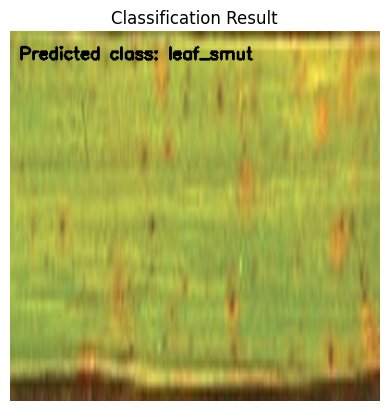

1/1 [==============================] - 0s 68ms/step
Predicted class: bacterial_leaf_blight


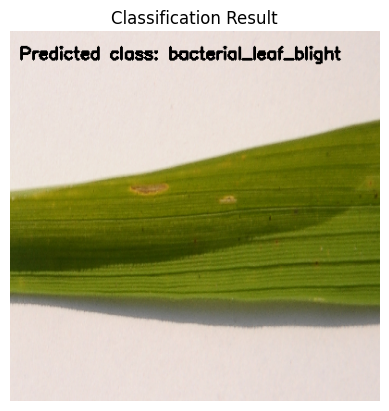

1/1 [==============================] - 0s 61ms/step
Predicted class: brown_spot


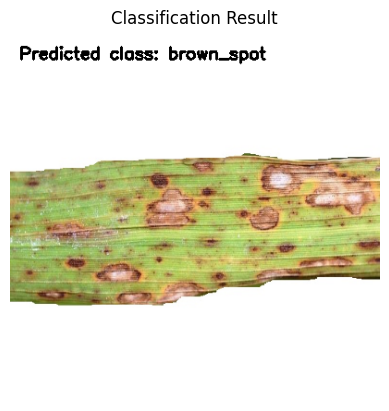

In [54]:
# Menampilkan hasil klasifikasi dengan output gambar
def show_classification(image_path, predicted_class):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Mengubah format warna gambar BGR menjadi RGB
    image = cv2.resize(image, (400, 400))
    cv2.putText(image, "Predicted class: " + predicted_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
    
    plt.imshow(image)
    plt.axis('off')
    plt.title("Classification Result")
    plt.show()

# Memuat beberapa gambar untuk diklasifikasikan
test_images = [
    '/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease/Leaf smut/DSC_0500.jpg',
    '/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease/Bacterial leaf blight/DSC_0370.jpg',
    '/content/drive/MyDrive/PCVK/Images/Rice Leaf Disease/Brown spot/DSC_0113.jpg'
]

for image_path2 in test_images:
    image = cv2.imread(image_path2)
    image = cv2.resize(image, input_shape[:2])
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)

    # Melakukan klasifikasi gambar
    predictions = model.predict(image)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]

    # Menampilkan hasil klasifikasi
    print("Predicted class:", predicted_class)

    # Menampilkan output gambar
    show_classification(image_path2, predicted_class)
